## Chi-Square Analysis

### First Question: Did more women and children suvive compared to men?

#### Dataset from Canvas (Titanic Passenger List.csv)

In [1]:
import pandas as pd

passenger_df = pd.read_csv('../data/titanic_passengers.csv')

passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


- What kind of data is the `dependent` variable? 
    - Ordinal
- What kind of data is the `independent` (gender) variable? 
    - Nominal 


    - `Ordinal` data. Data that can be ordered 
    - `Categorical/nominal` data. Data that can not be ordered

In [2]:
# Create contingency table
# NOTE: Margins = True will show the summary statistics
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'])

contingency_table

Lived_Died,died,lived
Gender,,
Female,143,339
Male,709,161


Text(0, 0.5, 'Count')

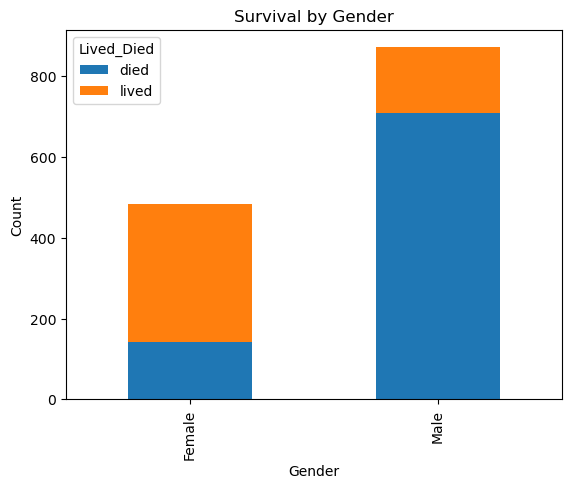

In [3]:
# Create a stacked bar chart of the contingency table
import matplotlib.pyplot as plt

# exlude the last column and rwo which are the margins (summary statistics)
contingency_table.plot(kind='bar', stacked=True)

# Give it a titile and label the axes
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

In [4]:
# Print the Chi Squared analysis
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi Square Value: {chi2}')
print(f'P-Value: {p}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequencies Table: \n{expected}')


# NOTE: With the Chi Square test, we are testing the null hypothesis that the two variables are independent
# You get 4 values back: 
# 1. The Chi Square value: The higher the value, the more likely the variables are dependent
# 2. The target p-value: The lower the value, the more likely the variables are dependent
# 3. The degrees of freedom: The number of values that are free to vary
# 4. Expected Frequencies Table: The expected values if the variables were independent


Chi Square Value: 355.24355436145913
P-Value: 3.0570688722545846e-79
Degrees of Freedom: 1
Expected Frequencies Table: 
[[303.74556213 178.25443787]
 [548.25443787 321.74556213]]


### Chi-Square Example: Was Age Relevant? 

In [5]:
# Cut the age column into bins for every 10 years

# Create the labels
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create the new column
passenger_df['Age_Group'] = pd.cut(passenger_df['Age'], bins=range(0, 90, 10), labels=labels)

# Create the contingency table
contingency_table = pd.crosstab(passenger_df['Age_Group'], passenger_df['Lived_Died'])

contingency_table
print(f'Chi2-Stats for Age Group:\n{chi2_contingency(contingency_table)}')

Chi2-Stats for Age Group:
Chi2ContingencyResult(statistic=24.465546982751874, pvalue=0.0009433264132943268, dof=7, expected_freq=array([[ 62.4246988 ,  37.5753012 ],
       [141.70406627,  85.29593373],
       [282.15963855, 169.84036145],
       [165.42545181,  99.57454819],
       [109.24322289,  65.75677711],
       [ 43.69728916,  26.30271084],
       [ 21.22439759,  12.77560241],
       [  3.12123494,   1.87876506]]))


<Axes: xlabel='Age_Group'>

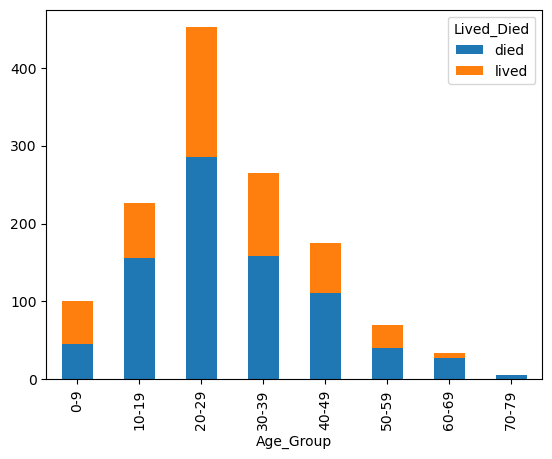

In [6]:
# Plot the contingency table
contingency_table.plot(kind='bar', stacked=True)

In [7]:
# Show the heatmap of age_group and lived_died
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

passenger_df = pd.read_csv('../data/titanic_passengers.csv')
passenger_df.columns

Index(['Name', 'Born', 'Died', 'Age', 'Gender', 'Passenger_Class',
       'Lived_Died', 'Fare', 'Fare_decimal'],
      dtype='object')

In [8]:
# Drop columns that are not needed
passenger_df = passenger_df.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal', 'Passenger_Class'], axis=1)
passenger_df.dropna(inplace=True) # Drop null values
# Encode the categorical variables
le = preprocessing.LabelEncoder()
passenger_df['Lived_Died_int'] = le.fit_transform(passenger_df['Lived_Died'])

# Create a heatmap 
# Use a pivot table to create a matrix of the data
pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Group'])
pivot_table.applymap(lambda x: 1-x) # Invert the values so that 0 is lived and 1 is died

#  Create the heatmap
plt.figure(figsize=(10, 6))
x_axis_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

sns.heatmap(pivot_table, cmap='rocket', annot=True, xticklabels=x_axis_labels, yticklabels=['Female', 'Male'], fmt='.2f')
plt.title('heatmap Comparing Age and Genderto Survival Rate on the Titanic') 
plt.xticks(rotation=45)



KeyError: 'Age_Group'

Chi Square Value: 104.05195288933228
P-Value: 2.543346399916496e-23
Degrees of Freedom: 2
Expected Frequencies Table: 
[[220.56213018 184.64201183 446.79585799]
 [129.43786982 108.35798817 262.20414201]]


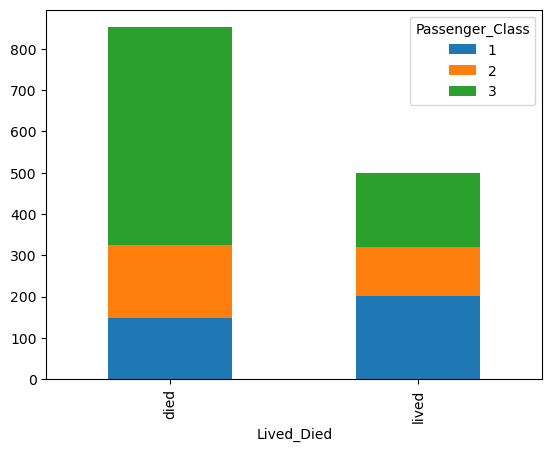

In [22]:
## TASK: Did the Titanic Passenger Class Affect Survival Rate?
## In this case the data is ordinal, so we can use the Chi Squared test

# Load the data and show the first few rows
passenger_df = pd.read_csv('../data/titanic_passengers.csv')
passenger_df.head()

# Create the contingency table
contingency_table = pd.crosstab(passenger_df['Lived_Died'], passenger_df['Passenger_Class'], margins=False)

# Plot the contingency table
contingency_table.plot(kind='bar', stacked=True)

# Run the Chi Squared analysis
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f'Chi Square Value: {chi2}')
print(f'P-Value: {p}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequencies Table: \n{expected}')



# Which passenger class is responsible for the significant difference in survival rate?
- Chi-Squared test offers that at least one of the classes is different from the others, but it doesn't tell us which one
- Since this is our first test it is considered a `Priori Test`
- To continue our analysis, we will run another test, a `Post Hoc` test

### Post-Hoc Test (Fisher's Exact Test)

- Compare very passenger class to every other class to see if there is statisical significance between the two.

#### TODO
- We could apply a Chi-squared test for each of the three classes, but our sample date is too small 
- In this case, `Fisher's Exact` test is a better option


In [34]:
# Load the data
passenger_df = pd.read_csv('../data/titanic_passengers.csv')
passenger_df.head()

# Make a contingency table
contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'], margins=False)

# Make variables for each class in the contingency table
first_class = contingency_table.iloc[0].values # Get the values of the first row
second_class = contingency_table.iloc[1].values # Get the values of the second row
third_class = contingency_table.iloc[2].values # Get the values of the third row

# Create a Fisher's Exact Test to determine if there is a relationship between the variables
from scipy.stats import fisher_exact

# Print the p value as a percentage
oddsratio, p = fisher_exact([first_class, second_class])
print(f'P-Value for First and Second Class: {p}')
print(f'Oddsratio for First and Second Class: {oddsratio}\n')

oddsratio, p = fisher_exact([first_class, third_class])
print(f'P-Value for First and Third Class: {p}')
print(f'Oddsratio for First and Third Class: {oddsratio}\n')

oddsratio, p = fisher_exact([second_class, third_class])
print(f'P-Value for Second and Third Class: {p}')
print(f'Oddsratio for Second and Third Class: {oddsratio}')




P-Value for First and Second Class: 1.827149276703859e-05
Oddsratio for First and Second Class: 0.49984363894811656

P-Value for First and Third Class: 7.457205699022123e-24
Oddsratio for First and Third Class: 0.25411766922960954

P-Value for Second and Third Class: 5.007621820657881e-06
Oddsratio for Second and Third Class: 0.5083943246019518


Each of the `Fisher's Exact` test reveals the statistical significance 

Another way to conceptualize the results is to look at percentages: 

| Passenger Class   | Died  | 
| ------------------| ------|
| First Class       | 43%   |
| Second Class      | 60%   | 
| THird Class       | 74%   |

TODO: Create a heatmap of Passenger Class split in Age_Range by Gender and survival rate

In [44]:
# Create a heatmap of Passenger Class split in Age_Range by Gender and survival rate
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

passenger_df = pd.read_csv('../data/titanic_passengers.csv')

# Drop columns that are not needed
passenger_df = passenger_df.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal'], axis=1, inplace=True)

le = preprocessing.LabelEncoder()
passenger_df['Lived_Died_int'] = le.fit_transform(passenger_df['Lived_Died'])
passenger_df['Age_Group'] = pd.cut(passenger_df['Age'], bins=range(0, 90, 10), labels=labels)

# pivot table
pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Group', 'Passenger_Class'])

# Create the heatmap
plt.figure(figsize=(10, 6))
# Create labels for all passenger classes and age groups
x_axis_labels = [f'PC {pc}: {age_group}' for pc in range(1, 4) for age_group in labels]

sns.heatmap(pivot_table, cmap='rocket', annot=True, xticklabels=x_axis_labels, yticklabels=['Female', 'Male'], fmt='.2f')
plt.title('Heatmap Comparing Age, Gender, and Passenger Class to Survival Rate on the Titanic')
plt.xticks(rotation=45)

TypeError: 'NoneType' object is not subscriptable

### T-Test: Fare and Gender

WHile `Chi-Test` and `Fisher-Test` focus on `categorical` discrete dependent variable, the `T-Test` and `ANOVA` test, target `continuous` data

#### How was Fare affected by Gender and Passenger Class? 
- Did one gender pay more than the other?
- Is there a difference in fare between passenger classes
- Is there an interaction between gender and passenger class on the resulting fare? 

In [10]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

# Load the data
passenger_df = pd.read_csv('../data/titanic_passengers.csv')


Text(0.5, 0, 'Gender')

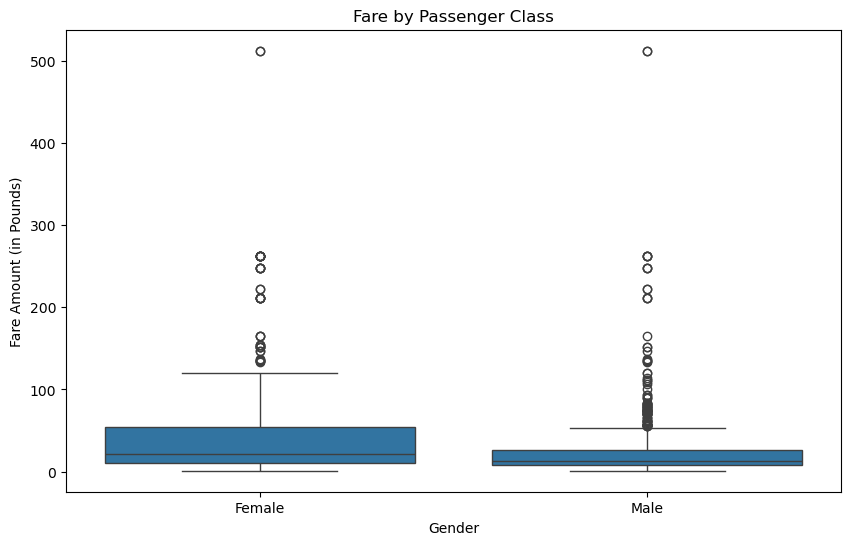

In [16]:
# Visulize the data using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y='Fare_decimal', x='Gender', data=passenger_df)
plt.title('Fare by Passenger Class')
plt.ylabel('Fare Amount (in Pounds)')
plt.xlabel('Gender')

In [27]:
male = passenger_df[passenger_df['Gender'] == 'Male']

male['Fare_decimal'].describe()

count    839.000000
mean      26.226067
std       42.514485
min        1.000000
25%        7.895000
50%       12.350000
75%       26.550000
max      512.330000
Name: Fare_decimal, dtype: float64

In [ ]:
female = passenger_df[passenger_df['Gender'] == 'Female']

female['Fare_decimal'].describe()

In [31]:
# Null hypotheses: There is no difference in fare between Male and Female passengers
# Alternative hypotheses: There is a difference in fare between male and Female passengers

from scipy.stats import ttest_ind # Independent t-test

# NOTE: In order to run test we need to drop the null values
passenger_df.dropna(inplace=True)
male = passenger_df[passenger_df['Gender'] == 'Male']
female = passenger_df[passenger_df['Gender'] == 'Female']

# Run test
t_stat, p = ttest_ind(male['Fare_decimal'], female['Fare_decimal'])
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p}') # If P-Value is less than 0.05, so we reject the null hypothesis




T-Statistic: -7.273526862266239
P-Value: 6.093364811911871e-13


## ANOVA Example; Price Difference Between Passenger Class
- `T-Test` specializes in comparing `two` populations
- `ANOVA (Analysis of Variance)` test will allow you to compare the influence of `three or more` populations

Fair prices are `continuous numerical dependent variable`. They are affected by the three passenger classes. 

Install new package:
```bash
conda install statsmodels
```

In [5]:
# Null Hypotheses: There is no difference in fare between the three passenger classes

# Install statsmodels
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm 
%matplotlib inline

# Load data
passenger_df = pd.read_csv('../data/titanic_passengers.csv')

In [7]:
# Load your OLS (Ordinary Least Squares) model
model = ols('Fare_decimal ~ C(Passenger_Class)', data=passenger_df).fit()

# ANOVA Table
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Passenger_Class),2.0,1.201111e+06,600555.522821,338.116478,2.964452e-119
Residual,1318.0,2.341004e+06,1776.179397,NaN,NaN


`PR(>)` is your `P-value`

#### Anova Notation (R-style Ormulas):
- The `~` separates hte left side from the right side
- The `+` adds a new separatedcolum to the design matrix 
- The `:` adds a new interaction column to the model matrix
- The `*` signifies that both individual columns are combined

The string `Fare_decimal ~ C(Passenger_Class)` translates to: 
- Fare decimal variable is affected by the categorical variable (`C`) Passenger class

Conclusion, there is some difference in price relative to the passenger class

Text(0.5, 0, 'Passenger Class')

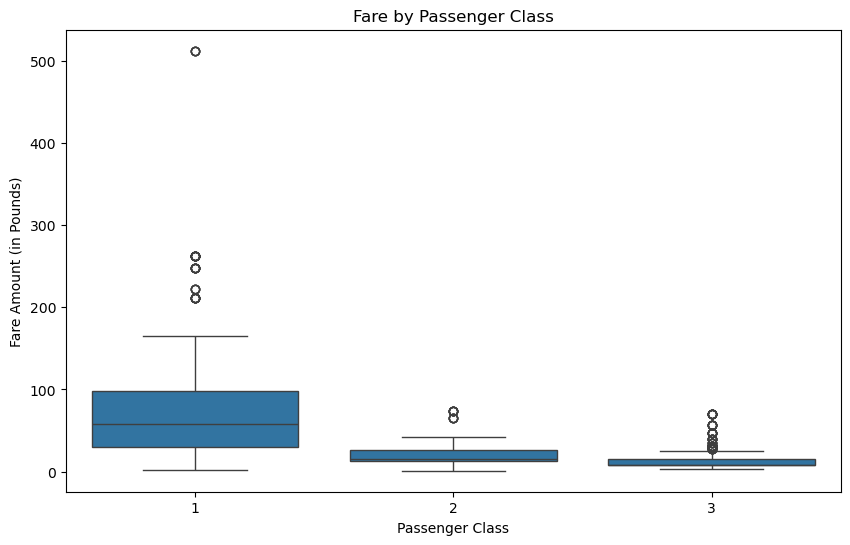

In [8]:
# Create a box plot of the fare paid by passenger class 
plt.figure(figsize=(10, 6))
sns.boxplot(y='Fare_decimal', x='Passenger_Class', data=passenger_df)
plt.title('Fare by Passenger Class')
plt.ylabel('Fare Amount (in Pounds)')
plt.xlabel('Passenger Class')


In [9]:
# TODO: Do a Post-Hoc test on the ANOVA test, for ANOVA we use the Tukey HSD test
# to compare each individual population from a statistically significant ANOVA test

from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm 
%matplotlib inline
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import tukeyhsd

# Load data
passenger_df = pd.read_csv('../data/titanic_passengers.csv')

columns_to_drop = ['Name', 'Born', 'Died', 'Fare', 'Lived_Died', 'Gender']

# Drop unused columns and null values
passenger_df.drop(columns=columns_to_drop, inplace=True) # Drop unused columns
passenger_df.dropna(inplace=True) # drop all NULLs

In [11]:
mc = MultiComparison(passenger_df['Fare_decimal'], passenger_df['Passenger_Class'])
result = mc.tukeyhsd()
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-64.5942,0.0,-72.6865,-56.5018,True
1,3,-72.9052,0.0,-79.4909,-66.3195,True
2,3,-8.311,0.016,-15.3695,-1.2525,True


If no statistical significance is found, then hte `reject` column will indicate `False`, that is, the `null-hypothesis` cannot be rejected.